In [1]:
import pandas as pd

training = pd.read_csv('training_dataset.csv')
blackscholes = pd.read_csv('testing_blackscholes.csv')
bodytrack = pd.read_csv('testing_bodytrack.csv')

datasets = {"training": training, "blackscholes": blackscholes, "bodytrack": bodytrack}

Dataset: training
r^2: 0.9853221792008559
MSE: 0.0102523832793711



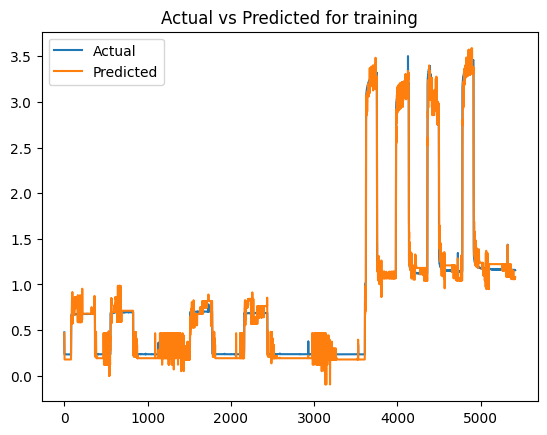

Dataset: blackscholes
r^2: 0.9974316264878532
MSE: 0.0034407659851158397



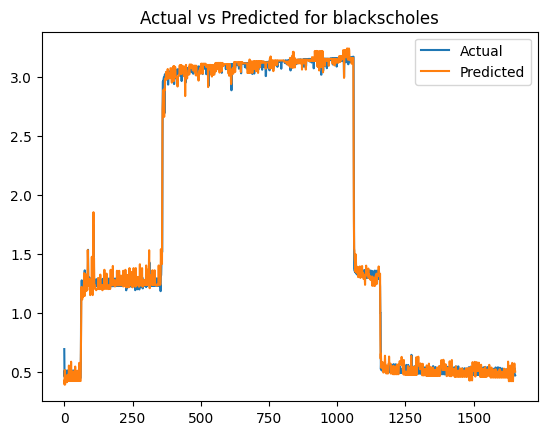

Dataset: bodytrack
r^2: 0.9590225864966417
MSE: 0.06529696746355917



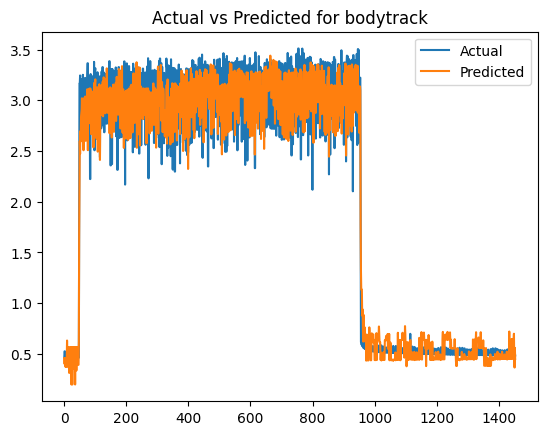

In [4]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import numpy as np


for dataset_name in datasets.keys():
    dataset = datasets[dataset_name]
    x = dataset.drop(["total_watts", "w_big", "w_little", "w_gpu", "w_mem"], axis=1)
    y= dataset["w_big"]

    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

    reg = LinearRegression()

    reg.fit(x_train, y_train)
    r2 = r2_score(y_test, reg.predict(x_test))
    y_pred = reg.predict(x_test)
    mse = np.mean((y_pred - y_test)**2)

    print("Dataset: {}".format(dataset_name))
    print("r^2: {}".format(r2))
    print("MSE: {}".format(mse))
    print()

    import matplotlib.pyplot as plt
    # Make an x-axis that is the same length as the number of rows in the dataset
    x_axis = np.arange(0, len(y), 1)

    # Predict the y values
    y_pred = reg.predict(x)

    # Plot the actual y values
    plt.plot(x_axis, y, label="Actual")

    # Plot the predicted y values
    plt.plot(x_axis, y_pred, label="Predicted")

    # Add a legend
    plt.legend()

    # Add a title
    plt.title("Actual vs Predicted for {}".format(dataset_name))

    # Show the plot
    plt.show()


    
